In [78]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/user/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [79]:
data = pd.read_csv('dataset/Resume/Resume.csv')
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [81]:
data.shape

(2484, 4)

In [82]:
data['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [83]:
len(data['Category'].value_counts())

24

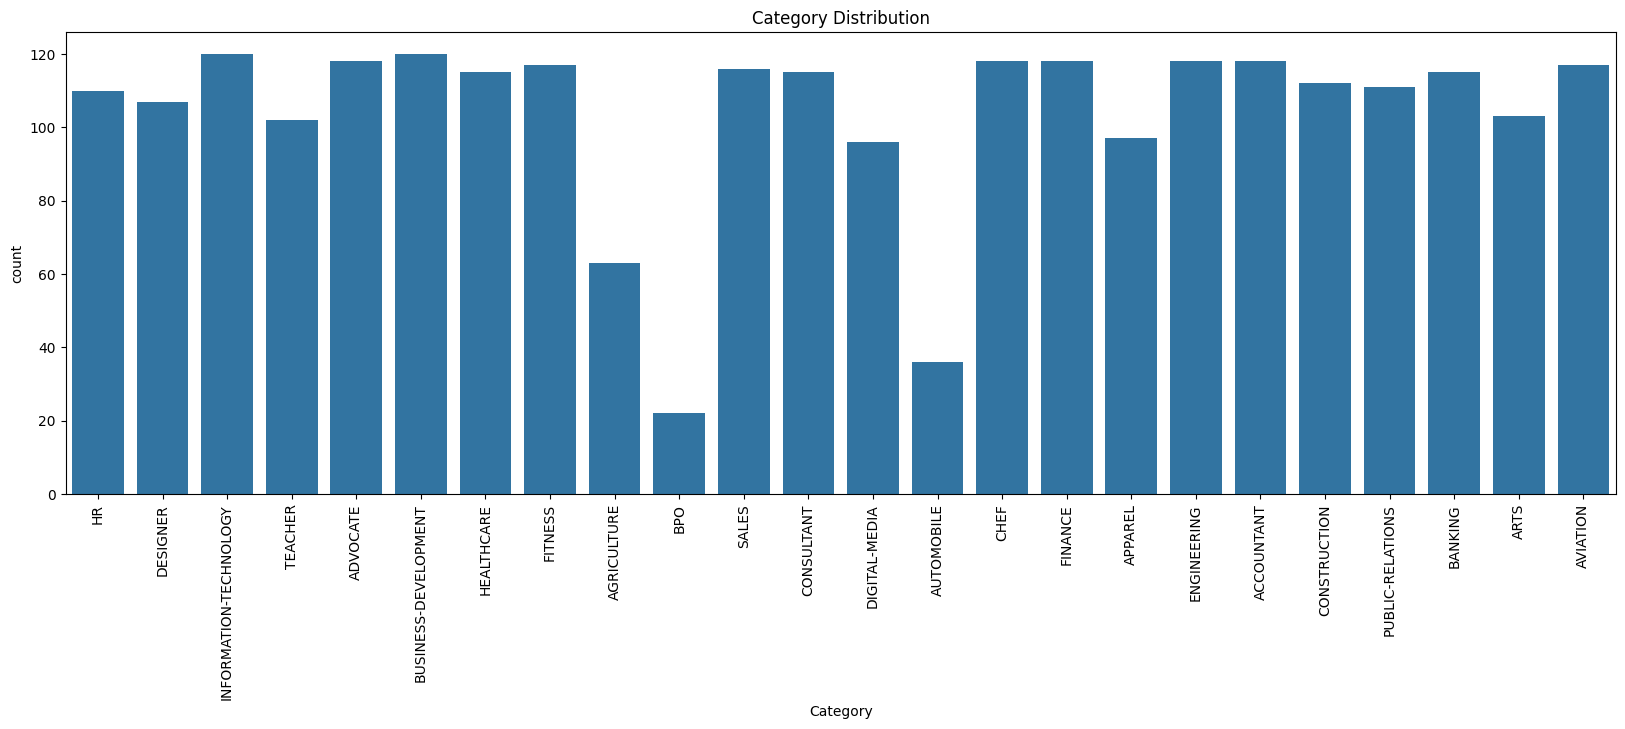

In [84]:
plt.figure(figsize=(20, 6))
sns.countplot(x=data['Category'])
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

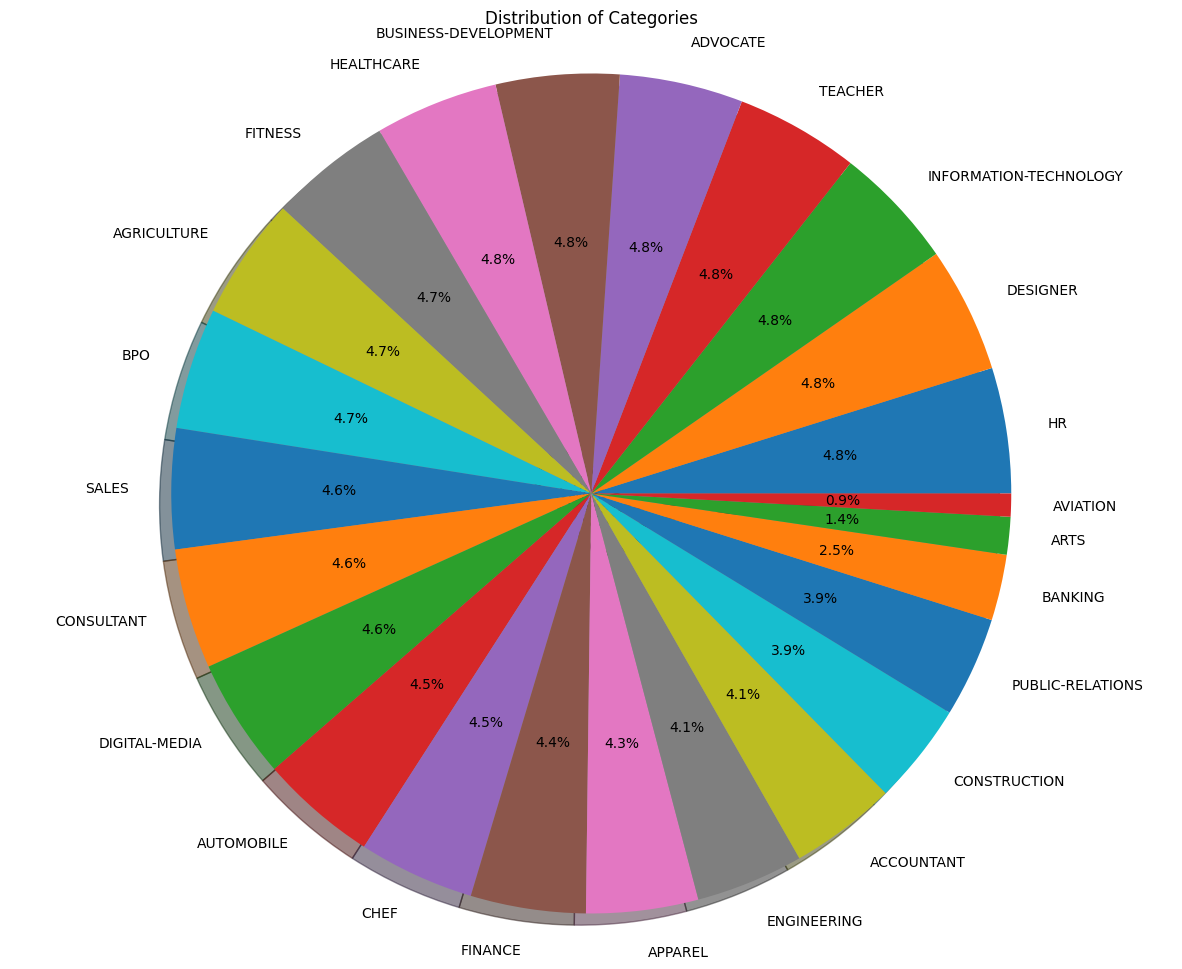

In [85]:
counts=data['Category'].value_counts()
labels=data['Category'].unique()

plt.figure(figsize=(15,12))
plt.pie(counts,labels= labels, autopct='%1.1f%%',shadow=True)
plt.title('Distribution of Categories')
plt.axis('equal')  
plt.show()

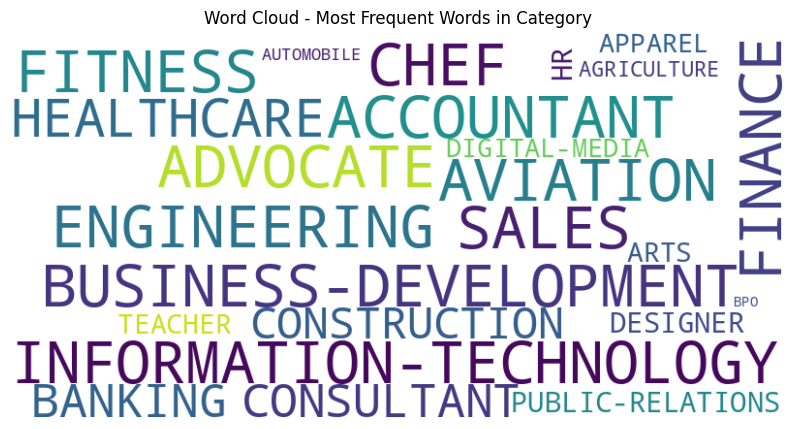

In [86]:
combined_text = ' '.join(data['Category'])

word_counts = Counter(combined_text.split())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words in Category')
plt.show()

In [87]:
data.isna().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [88]:
data.drop(columns = ['ID', 'Resume_html'], inplace = True)
data.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [89]:
stemmer = PorterStemmer()
def preprocess(txt):
    # Remove non-english characters, punctuation,special characters, digits, continous underscores and extra whitespace
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub(r'<.*?>', ' ', txt)
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub(r'[^\w\s]|_', ' ', txt)
    txt = re.sub(r'\d+', ' ', txt)
    txt = re.sub(r'\s+', ' ', txt).strip()
    txt = txt.lower()
    txt = word_tokenize(txt)
    txt = [w for w in txt if not w in stopwords.words('english')]
    txt = [stemmer.stem(w) for w in txt]
    return ' '.join(txt)

In [90]:
data['Resume'] = data['Resume_str'].apply(lambda x: preprocess(x))

In [91]:
data.head()

,Resume_str,Category,Resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administr market associ hr administr summar...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr oper summari versatil medi...
2,HR DIRECTOR Summary Over 2...,HR,hr director summari year experi recruit plu ye...
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summari dedic driven dynam year ...
4,HR MANAGER Skill Highlights ...,HR,hr manag skill highlight hr skill hr depart st...


In [92]:
data.shape

(2484, 3)

In [93]:
empty_rows = data[data['Resume'] == '']
print(empty_rows)

                Resume_str              Category Resume
656                         BUSINESS-DEVELOPMENT       


In [94]:
data = data.drop(['Resume_str'], axis=1)

data = data.drop(empty_rows.index)

In [95]:
data.shape

(2483, 2)

In [96]:
data.Resume[0]

'hr administr market associ hr administr summari dedic custom servic manag year experi hospit custom servic manag respect builder leader custom focus team strive instil share enthusiast commit custom servic highlight focus custom satisfact team manag market savvi conflict resolut techniqu train develop skill multi tasker client relat specialist accomplish missouri dot supervisor train certif certifi ihg custom loyalti market segment hilton worldwid gener manag train certif accomplish trainer cross server hospit system hilton onq micro opera pm fidelio opera reserv system or holidex complet cours seminar custom servic sale strategi inventori control loss prevent safeti time manag leadership perform assess experi hr administr market associ hr administr dec current compani name citi state help develop polici direct coordin activ employ compens labor relat benefit train employe servic prepar employe separ notic relat document keep record benefit plan particip insur pension plan personnel t

In [97]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [98]:
data['Category_encoded']=encoder.fit_transform(data['Category'])

In [99]:
data.head()

,Category,Resume,Category_encoded
0,HR,hr administr market associ hr administr summar...,19
1,HR,hr specialist us hr oper summari versatil medi...,19
2,HR,hr director summari year experi recruit plu ye...,19
3,HR,hr specialist summari dedic driven dynam year ...,19
4,HR,hr manag skill highlight hr skill hr depart st...,19


In [100]:
data.Category_encoded.unique()

array([19, 13, 20, 23,  1,  9, 18, 17,  2,  8, 22, 12, 14,  5, 10, 16,  3,
       15,  0, 11, 21,  7,  4,  6])

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True)

x = data['Resume'].values
y = data['Category_encoded'].values

tfidf.fit(x)
tfidf_matrix  = tfidf.transform(x)

In [102]:
tfidf_matrix.shape

(2483, 26812)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

In [104]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1986, 26812)
X_test shape: (497, 26812)
y_train shape: (1986,)
y_test shape: (497,)


In [105]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : ',model_svm.score(X_train, y_train))
print('Accuracy of test set : ',model_svm.score(X_test, y_test))
print('Classification report for classifier\n',classification_report(y_test, y_pred))

Accuracy of training set :  0.9889224572004028
Accuracy of test set :  0.6016096579476862
Classification report for classifier
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        28
           1       0.62      0.50      0.56        30
           2       0.00      0.00      0.00        10
           3       0.58      0.50      0.54        14
           4       0.18      0.22      0.20        18
           5       0.00      0.00      0.00         5
           6       0.83      0.79      0.81        24
           7       0.57      0.75      0.65        16
           8       0.00      0.00      0.00         3
           9       0.55      0.52      0.53        23
          10       0.93      0.81      0.86        31
          11       0.82      0.72      0.77        32
          12       0.23      0.26      0.24        23
          13       0.82      0.74      0.78        19
          14       0.72      0.59      0.65        22
       

/Users/user/Documents/resume-categorization/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Documents/resume-categorization/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Documents/resume-categorization/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [106]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : ',model_knn.score(X_train, y_train))
print('Accuracy of  test set : ',model_knn.score(X_test, y_test))
print('Classification report for classifier\n',classification_report(y_test, y_pred))

Accuracy of training set :  0.6445115810674723
Accuracy of  test set :  0.5251509054325956
Classification report for classifier
               precision    recall  f1-score   support

           0       0.47      0.82      0.60        28
           1       0.32      0.40      0.36        30
           2       0.25      0.10      0.14        10
           3       0.22      0.36      0.27        14
           4       0.18      0.17      0.17        18
           5       0.17      0.20      0.18         5
           6       0.89      0.67      0.76        24
           7       0.50      0.75      0.60        16
           8       0.00      0.00      0.00         3
           9       0.41      0.48      0.44        23
          10       0.86      0.81      0.83        31
          11       0.77      0.75      0.76        32
          12       0.15      0.09      0.11        23
          13       0.64      0.37      0.47        19
          14       0.48      0.50      0.49        22
      

In [114]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=250)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print('Accuracy of training set : ',model_rf.score(X_train, y_train))
print('Accuracy of  test set : ',model_rf.score(X_test, y_test))
print('Classification report for classifier\n',classification_report(y_test, y_pred))

Accuracy of training set :  1.0
Accuracy of  test set :  0.641851106639839
Classification report for classifier
               precision    recall  f1-score   support

           0       0.71      0.89      0.79        28
           1       0.74      0.57      0.64        30
           2       0.50      0.20      0.29        10
           3       0.73      0.79      0.76        14
           4       0.33      0.11      0.17        18
           5       0.00      0.00      0.00         5
           6       0.81      0.88      0.84        24
           7       0.53      0.62      0.57        16
           8       0.00      0.00      0.00         3
           9       0.67      0.52      0.59        23
          10       0.78      0.90      0.84        31
          11       0.81      0.78      0.79        32
          12       0.40      0.09      0.14        23
          13       0.79      0.79      0.79        19
          14       0.65      0.50      0.56        22
          15       0.5

/Users/user/Documents/resume-categorization/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Documents/resume-categorization/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Documents/resume-categorization/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [108]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
print('Accuracy of training set: ',model_dt.score(X_train, y_train))
print('Accuracy of  test set: ',model_dt.score(X_test, y_test))
print('Classification report for classifier\n',classification_report(y_test, y_pred))

Accuracy of training set:  1.0
Accuracy of  test set:  0.5090543259557344
Classification report for classifier
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        28
           1       0.57      0.43      0.49        30
           2       0.08      0.10      0.09        10
           3       0.41      0.50      0.45        14
           4       0.29      0.33      0.31        18
           5       0.14      0.20      0.17         5
           6       0.70      0.88      0.78        24
           7       0.32      0.50      0.39        16
           8       0.00      0.00      0.00         3
           9       0.17      0.13      0.15        23
          10       0.93      0.81      0.86        31
          11       0.82      0.84      0.83        32
          12       0.25      0.26      0.26        23
          13       0.42      0.53      0.47        19
          14       0.39      0.50      0.44        22
          15       0.53

In [115]:
accuracy = {'svm': accuracy_svm, 'knn': accuracy_knn, 'dt': accuracy_dt, 'rf': accuracy_rf}
best_model = max(accuracy, key=accuracy.get)
print(f"The model with the highest accuracy is {best_model} with an accuracy of {accuracy[best_model]}")

The model with the highest accuracy is rf with an accuracy of 0.641851106639839


In [110]:
category_mapping = {}
for i,j in zip(encoder.classes_, encoder.transform(encoder.classes_)):
    category_mapping[i] = int(j)

category_mapping

{'ACCOUNTANT': 0,
 'ADVOCATE': 1,
 'AGRICULTURE': 2,
 'APPAREL': 3,
 'ARTS': 4,
 'AUTOMOBILE': 5,
 'AVIATION': 6,
 'BANKING': 7,
 'BPO': 8,
 'BUSINESS-DEVELOPMENT': 9,
 'CHEF': 10,
 'CONSTRUCTION': 11,
 'CONSULTANT': 12,
 'DESIGNER': 13,
 'DIGITAL-MEDIA': 14,
 'ENGINEERING': 15,
 'FINANCE': 16,
 'FITNESS': 17,
 'HEALTHCARE': 18,
 'HR': 19,
 'INFORMATION-TECHNOLOGY': 20,
 'PUBLIC-RELATIONS': 21,
 'SALES': 22,
 'TEACHER': 23}

In [116]:
import pickle
filename = 'modelRF.pkl'
pickle.dump(model_rf,open(filename,'wb'))

In [117]:
filename = 'vectorizer.pkl'
pickle.dump(tfidf,open(filename,'wb'))

In [118]:
resume = tfidf.transform([data['Resume'][0]])
int(model_svm.predict(resume)[0])

19